# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

It is used to discover patterns in the visual data. Such as the camera of a self driving car recognizing the cars in front

## Get the data

The images we're working with are from FOOD101 dataset (101 different classes of food) : https://www.kaggle.com/dansbecker/food-101

However, we have modified it to only use two classes pizza and steak using the image data modification notebook.

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-28 08:14:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   243MB/s    in 0.4s    

2023-11-28 08:14:36 (243 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
# get the number of files
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in pizza_steak.
There are 2 directories and 0 files in pizza_steak/test.
There are 0 directories and 250 files in pizza_steak/test/steak.
There are 0 directories and 250 files in pizza_steak/test/pizza.
There are 2 directories and 0 files in pizza_steak/train.
There are 0 directories and 750 files in pizza_steak/train/steak.
There are 0 directories and 750 files in pizza_steak/train/pizza.


In [6]:
# Another way to find the len using listdir
num_steak_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_train

750

> There are 750 images of pizza and 750 images of steak in train dataset
> There are 250 images of pizza and 250 images of steak in test dataset

## Get the classnames programatically

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Plot the image
  img = mpimage.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


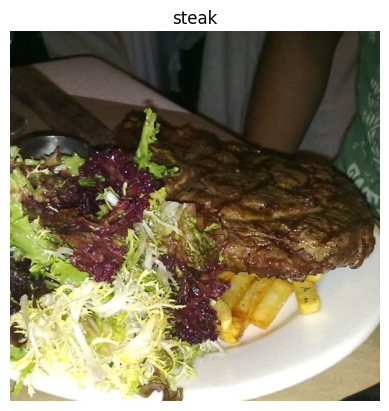

In [9]:
img = view_random_image("pizza_steak/train/", "steak")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 20,  25,  21],
        [ 20,  25,  21],
        [ 20,  25,  21],
        ...,
        [ 37,  51,  34],
        [ 37,  54,  35],
        [ 36,  53,  34]],

       [[ 22,  27,  23],
        [ 22,  27,  23],
        [ 23,  28,  24],
        ...,
        [ 36,  50,  33],
        [ 35,  52,  33],
        [ 35,  52,  33]],

       [[ 25,  30,  26],
        [ 25,  30,  26],
        [ 27,  32,  28],
        ...,
        [ 35,  49,  32],
        [ 33,  50,  32],
        [ 36,  53,  35]],

       ...,

       [[183, 166, 112],
        [186, 169, 117],
        [187, 170, 118],
        ...,
        [ 28,  33,  27],
        [ 27,  32,  26],
        [ 27,  32,  26]],

       [[188, 167, 120],
        [191, 170, 123],
        [190, 172, 126],
        ...,
        [ 27,  32,  26],
        [ 27,  32,  26],
        [ 27,  32,  26]],

       [[186, 164, 123],
        [189, 167, 126],
        [190, 168, 127],
        ...,
        [ 26,  31,  2

In [11]:
# normalize the values into 0 and 1
img/255.

array([[[0.07843137, 0.09803922, 0.08235294],
        [0.07843137, 0.09803922, 0.08235294],
        [0.07843137, 0.09803922, 0.08235294],
        ...,
        [0.14509804, 0.2       , 0.13333333],
        [0.14509804, 0.21176471, 0.1372549 ],
        [0.14117647, 0.20784314, 0.13333333]],

       [[0.08627451, 0.10588235, 0.09019608],
        [0.08627451, 0.10588235, 0.09019608],
        [0.09019608, 0.10980392, 0.09411765],
        ...,
        [0.14117647, 0.19607843, 0.12941176],
        [0.1372549 , 0.20392157, 0.12941176],
        [0.1372549 , 0.20392157, 0.12941176]],

       [[0.09803922, 0.11764706, 0.10196078],
        [0.09803922, 0.11764706, 0.10196078],
        [0.10588235, 0.1254902 , 0.10980392],
        ...,
        [0.1372549 , 0.19215686, 0.1254902 ],
        [0.12941176, 0.19607843, 0.1254902 ],
        [0.14117647, 0.20784314, 0.1372549 ]],

       ...,

       [[0.71764706, 0.65098039, 0.43921569],
        [0.72941176, 0.6627451 , 0.45882353],
        [0.73333333, 0

## End to End Example
- Instead of doing one example at a time, it will be better to do an end to end example
1. Load images
2. Preprocess images
3. Build a CNN to build patterns in our images
4. Compile our CNN
4. Fit the CNN to our training dataset

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (same as the TinyVGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu"
    ),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    tf.keras.layers.Conv2D(
        10, 3, activation="relu"
    ),
    tf.keras.layers.Conv2D(
        10, 3, activation="relu"
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 155ms/step - loss: 0.5988 - accuracy: 0.6980 - val_loss: 0.4820 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4607 - accuracy: 0.8080 - val_loss: 0.4109 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4249 - accuracy: 0.8207 - val_loss: 0.3742 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4054 - accuracy: 0.8207 - val_loss: 0.3234 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3409 - accuracy: 0.8553 - val_loss: 0.3546 - val_accuracy: 0.8500


In [13]:
 # Get the model summary
 model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

> NOTE: Read through CNN explainer [WEBSITE](https://poloclub.github.io/cnn-explainer/)

## Using the model from tensorflow playground
- training the image data on model without CNN with simple binary classification model [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.45591&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 0.9268 - accuracy: 0.4873 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
# get a model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Updating the previous model

In [16]:
# Upgrade the previous model
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 8s 116ms/step - loss: 3.3433 - accuracy: 0.6400 - val_loss: 1.8443 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 1.6372 - accuracy: 0.6793 - val_loss: 0.8328 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 1.0808 - accuracy: 0.6987 - val_loss: 1.9536 - val_accuracy: 0.5540
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6172 - accuracy: 0.7747 - val_loss: 0.4738 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.5393 - accuracy: 0.7713 - val_loss: 0.6097 - val_accuracy: 0.7340


## Comparing parameters for each model

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification
1. Becoming one with data (Visualize)
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Becoming one with data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


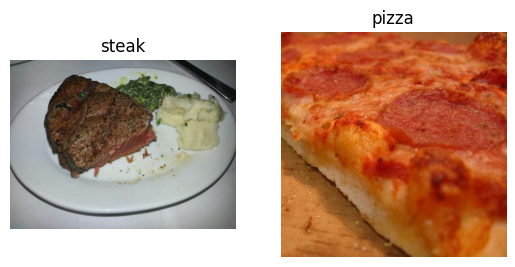

In [20]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


## Preprocess the data (Scaling / Normalization)

In [21]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next step is to turn our data into **batches**

In [22]:
!nvidia-smi

Tue Nov 28 08:16:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    25W /  70W |   2363MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Loading all the train data images into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="binary",
    seed=42,
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# View the first batch
images, labels = train_data.next()

### Create a CNN model (start with a baseline)

A baseline is a relatively simple model that we start at the beginning

In [26]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding="valid",
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [27]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 7s 122ms/step - loss: 1.0906 - accuracy: 0.6493 - val_loss: 0.4526 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4531 - accuracy: 0.8020 - val_loss: 0.3844 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3826 - accuracy: 0.8420 - val_loss: 0.4131 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.2842 - accuracy: 0.8973 - val_loss: 0.3963 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.1884 - accuracy: 0.9373 - val_loss: 0.3974 - val_accuracy: 0.8220


## 5.Evaluating our model


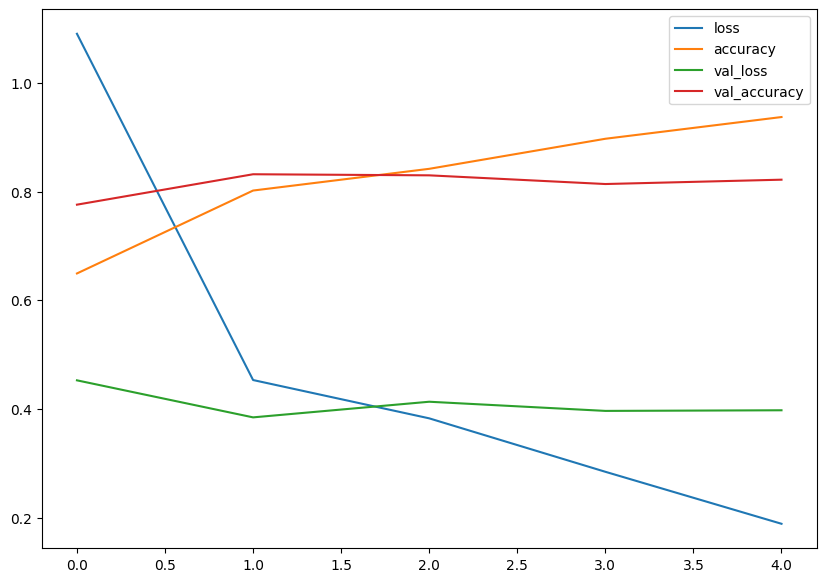

In [28]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [29]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot the loss curve
  plt.figure()
  plt.plot(epochs, loss, label="Traingin loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss curves")
  plt.xlabel("Epochs")
  plt.legend();

  # plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Traingin Accuracy")
  plt.plot(epochs, val_accuracy, label="Validation Accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.legend();

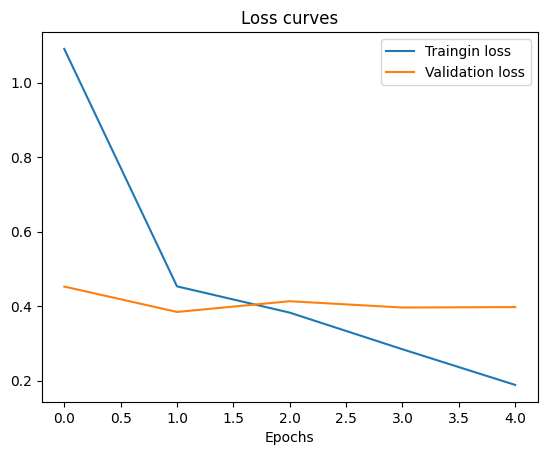

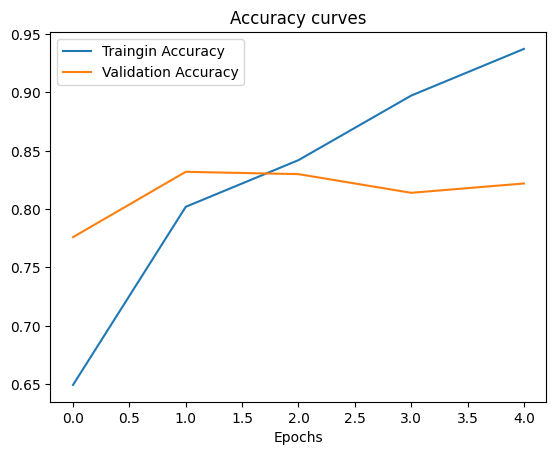

In [30]:
plot_loss_curves(history_4)

- As you can see the validation loss is increasing, this means the model may be overfitting the training dataset

### Reduce Overfitting
- Data Augmentation
- Add regularization layers such as MaxPool2D
- Add more data

## Reducing overfitting by MaxPool2D

In [31]:
# create a new model
tf.random.set_seed(42)

# Build the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [32]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 8s 145ms/step - loss: 0.6095 - accuracy: 0.6807 - val_loss: 0.4632 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4525 - accuracy: 0.7993 - val_loss: 0.3757 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4110 - accuracy: 0.8247 - val_loss: 0.3591 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3944 - accuracy: 0.8293 - val_loss: 0.4071 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3901 - accuracy: 0.8293 - val_loss: 0.3414 - val_accuracy: 0.8560


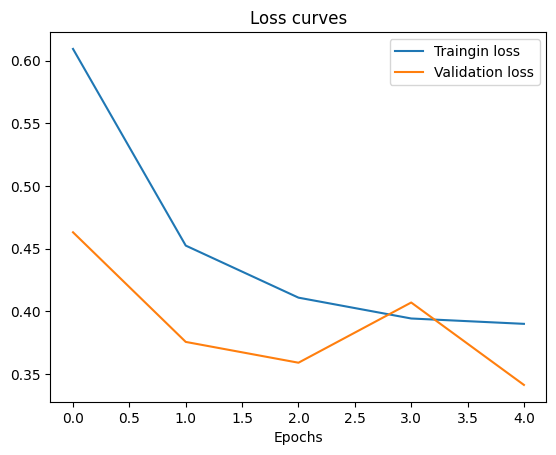

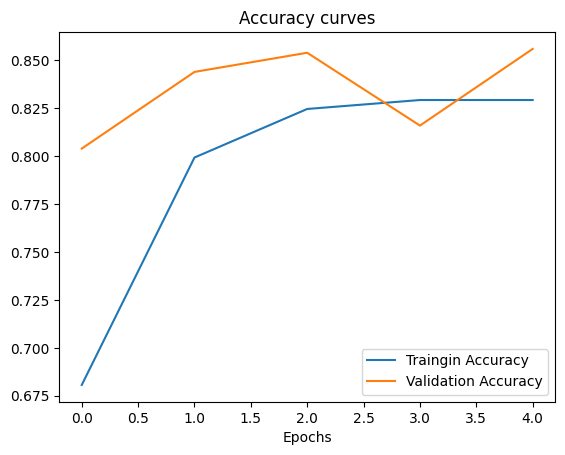

In [33]:
# Plot loss curves
plot_loss_curves(history_5)

In [34]:
# evaluate the model
model_5.evaluate(test_data)

16/16 [==============================] - 2s 99ms/step - loss: 0.3414 - accuracy: 0.8560


[0.3413936495780945, 0.8560000061988831]

## Reduce Overfitting by Data Augmentation

> Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns.
- Altering might mean rotating, shifting, flipping or something else

In [35]:
# Create image data generator with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

### Visualize data augmentation

In [36]:
 # Create an augmented training data
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Create non augmented training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Create test data
test_data = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [37]:
# Plot the images
images, labels = train_data.next()
images_augmented, labels_augmented = train_data_augmented.next()


(-0.5, 223.5, 223.5, -0.5)

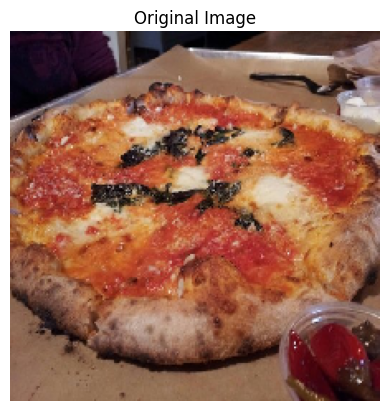

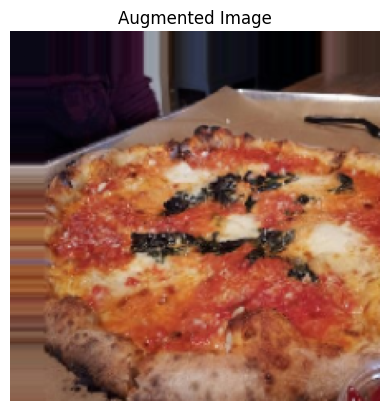

In [38]:
import random
random_number = random.randint(0, 32)
plt.figure()
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")

plt.figure()
plt.imshow(images_augmented[random_number])
plt.title("Augmented Image")
plt.axis("Off")

### Build a model on augmented data

In [39]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 532ms/step - loss: 0.7142 - accuracy: 0.4733 - val_loss: 0.6835 - val_accuracy: 0.5173
Epoch 2/5
47/47 [==============================] - 23s 497ms/step - loss: 0.6920 - accuracy: 0.4913 - val_loss: 0.6807 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6944 - accuracy: 0.5460 - val_loss: 0.6834 - val_accuracy: 0.5013
Epoch 4/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6972 - accuracy: 0.4973 - val_loss: 0.6704 - val_accuracy: 0.6613
Epoch 5/5
47/47 [==============================] - 25s 545ms/step - loss: 0.6705 - accuracy: 0.6253 - val_loss: 0.6108 - val_accuracy: 0.6993


### Building a model with augmented data and shuffled

In [40]:
 # Create an augmented training data
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

# Create non augmented training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

# Create test data
test_data = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [41]:
# Build the model
# set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 534ms/step - loss: 0.6417 - accuracy: 0.6127 - val_loss: 0.6490 - val_accuracy: 0.6193
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5387 - accuracy: 0.7347 - val_loss: 0.4390 - val_accuracy: 0.7987
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.4911 - accuracy: 0.7720 - val_loss: 0.4445 - val_accuracy: 0.7873
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4635 - accuracy: 0.7887 - val_loss: 0.3888 - val_accuracy: 0.8347
Epoch 5/5
47/47 [==============================] - 24s 510ms/step - loss: 0.4886 - accuracy: 0.7827 - val_loss: 0.4095 - val_accuracy: 0.8180


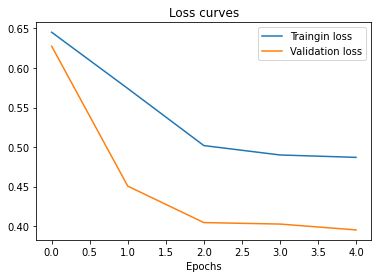

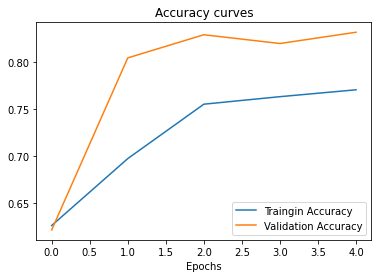

In [ ]:
plot_loss_curves(history_7)

## Ways to improve the model

- Adding the layers
- increase the number of filters
- Train for longer
- Find an ideal learning rate
- Get more data
- transfer learning

## Making a prediction with our trained data on some custom image

--2023-11-28 08:30:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-11-28 08:30:26 (44.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



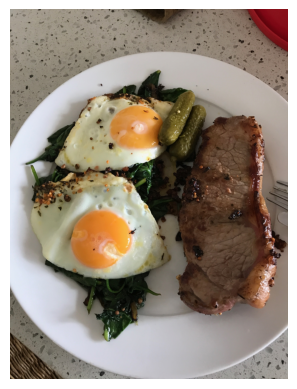

In [42]:
# View our example image
import matplotlib.image as mpimage
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimage.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [43]:
steak.shape

(4032, 3024, 3)

In [44]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

> Image size and rescaling is required

In [45]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [46]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [47]:
# predict the image
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 155ms/step


array([[0.94792914]], dtype=float32)

In [48]:
# converting the probabilities to class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [49]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 165ms/step


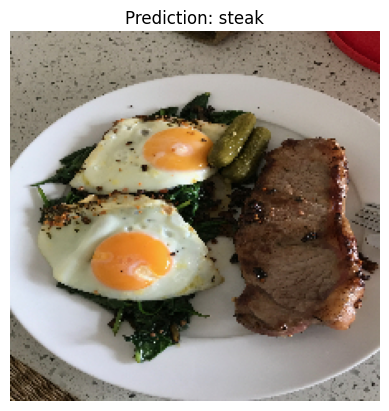

In [50]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names)